In [4]:
import pandas as pd
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df[df['title'].str.contains('Toy Story')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [8]:
genres = df['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_movies = pd.concat([df, genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [12]:
dft = pd.DataFrame(scaled_genres)
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,-0.05918,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [13]:
genres.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [52]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 3)
model.fit (scaled_genres)

KMeans(n_clusters=3)

In [53]:
model.labels_

array([1, 1, 2, ..., 2, 1, 2])

In [54]:
model.cluster_centers_

array([[-5.91799474e-02,  3.96068766e-01, -2.52832055e-01,
        -2.25146863e-01, -2.57547238e-01, -2.27542305e-01,
         2.55545141e+00, -1.97914585e-01,  1.78855063e-01,
        -2.40856319e-01,  6.48274368e-01, -1.71734600e-01,
        -7.04697394e-02, -1.52674295e-01,  3.85816584e-01,
        -2.53724386e-01, -2.53348066e-01,  7.35185422e-01,
        -1.60133280e-01, -6.31671060e-02],
       [-5.91799474e-02,  9.00966637e-01,  1.48170324e+00,
         1.03132061e+00,  1.00453667e+00, -1.80906724e-01,
        -3.46739824e-01, -2.11606220e-01, -5.45210427e-01,
         9.25874272e-01, -8.84323565e-02, -1.18586253e-01,
         5.29315895e-01,  1.40586910e-01, -9.42061159e-02,
        -2.72633811e-01,  8.96279994e-01, -5.75121690e-02,
        -5.40994440e-02, -2.91300350e-04],
       [ 2.46791141e-02, -2.85388650e-01, -3.07573058e-01,
        -2.05285992e-01, -1.93111771e-01,  8.37849225e-02,
        -3.74631584e-01,  8.57940831e-02,  9.78207623e-02,
        -1.77367696e-01, -9.4

In [55]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_clusters.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.396069,-0.252832,-0.225147,-0.257547,-0.227542,2.555451,-0.197915,0.178855,-0.240856,0.648274,-0.171735,-0.070470,-0.152674,0.385817,-0.253724,-0.253348,0.735185,-0.160133,-0.063167
1,-0.059180,0.900967,1.481703,1.031321,1.004537,-0.180907,-0.346740,-0.211606,-0.545210,0.925874,-0.088432,-0.118586,0.529316,0.140587,-0.094206,-0.272634,0.896280,-0.057512,-0.054099,-0.000291
2,0.024679,-0.285389,-0.307573,-0.205286,-0.193112,0.083785,-0.374632,0.085794,0.097821,-0.177368,-0.094926,0.058961,-0.113427,-0.006160,-0.046595,0.110310,-0.168086,-0.117837,0.041531,0.011371


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B67A441F0>,
      dtype=object)

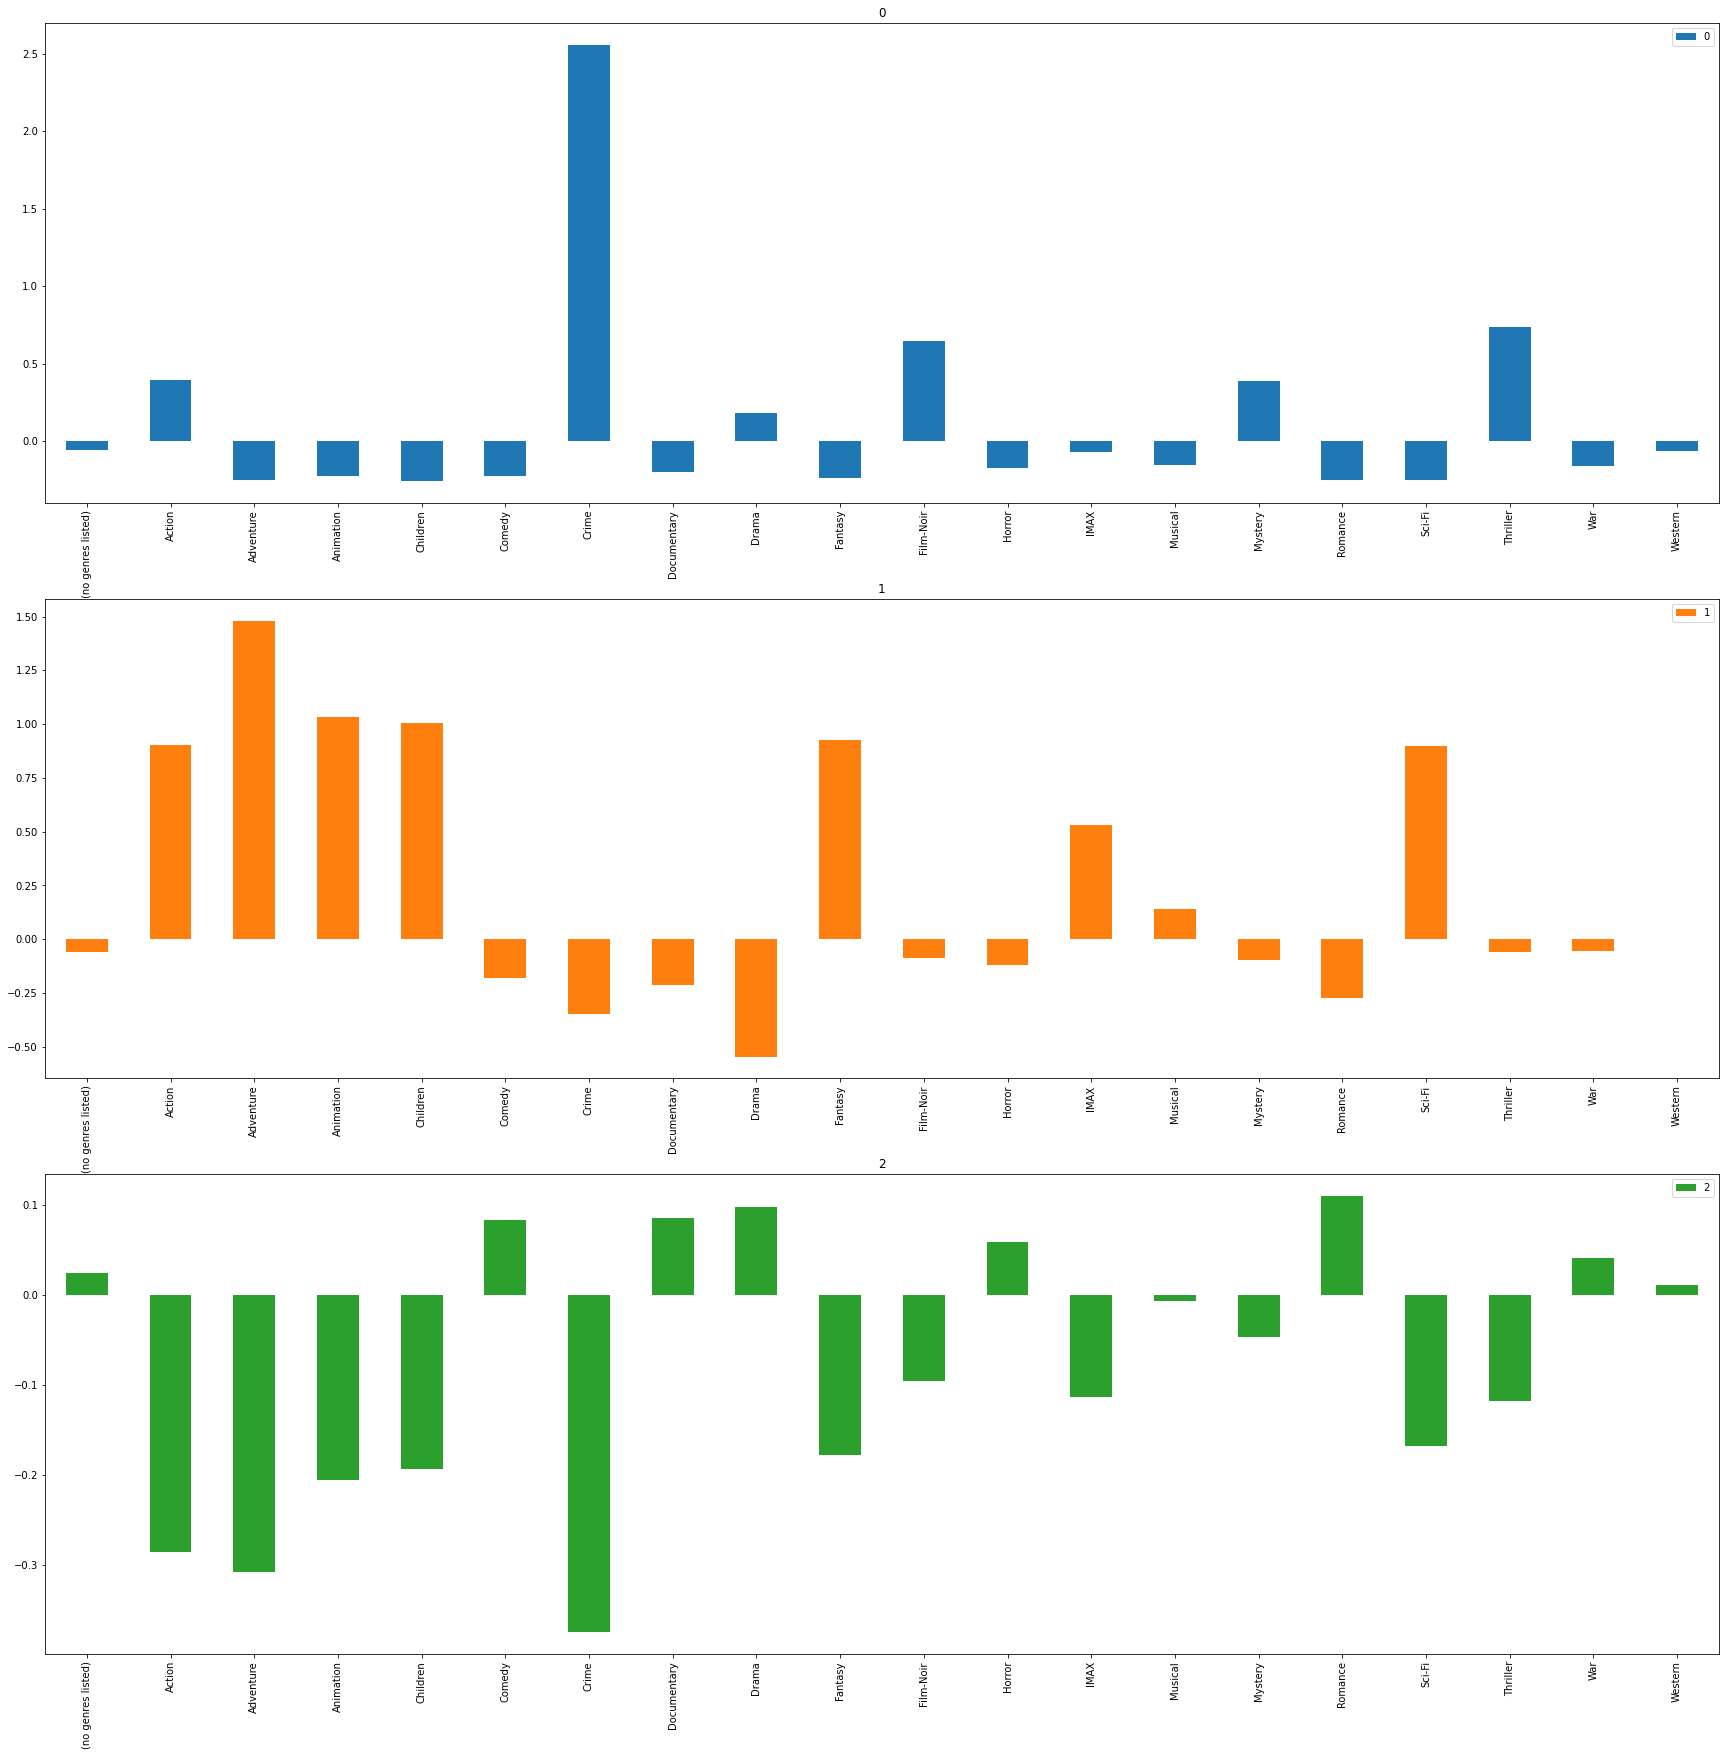

In [57]:
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False)

In [58]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 20)
model.fit (scaled_genres)

KMeans(n_clusters=20)

In [59]:
model.labels_

array([ 6, 14,  7, ...,  1,  6, 16])

In [60]:
df_movies[model.labels_ == 0].head() #Primeiro dos clusters do total de 20

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
69,77,Nico Icon (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,108,Catwalk (1996),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,116,Anne Frank Remembered (1995),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,128,Jupiter's Wife (1994),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_clusters.head(20)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
1,-0.059180,-0.360667,-0.293761,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.170632,-0.202020,-0.132065
2,-0.059180,1.404130,-0.385949,-0.258679,-0.270451,-0.721057,-0.374632,-0.217489,-0.533451,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.366166,0.230112,1.558823,-0.202020,-0.132065
3,-0.059180,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
5,-0.059180,0.171363,-0.088252,-0.258679,-0.261433,-0.339191,-0.312370,-0.217489,-0.498036,-0.252914,-0.094926,1.012099,-0.128397,-0.188419,-0.249986,-0.375087,2.990120,0.180652,-0.202020,-0.132065
6,-0.059180,0.176955,0.865241,3.865793,1.561554,0.139440,-0.267496,-0.217489,-0.646263,0.712770,-0.094926,-0.258272,-0.128397,-0.188419,-0.170790,-0.313974,0.298814,-0.444175,-0.180686,-0.132065
7,-0.059180,-0.429234,-0.313444,-0.258679,-0.270451,1.262425,-0.296135,-0.217489,-0.070471,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.301094,-0.469538,-0.202020,-0.132065
8,-0.059180,-0.244931,-0.354938,-0.251519,-0.270451,-0.356961,-0.179102,-0.217489,-0.579037,-0.166795,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.367582,-0.334435,0.680039,-0.202020,-0.132065
9,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513


In [106]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B7137D700>,
      dtype=object)

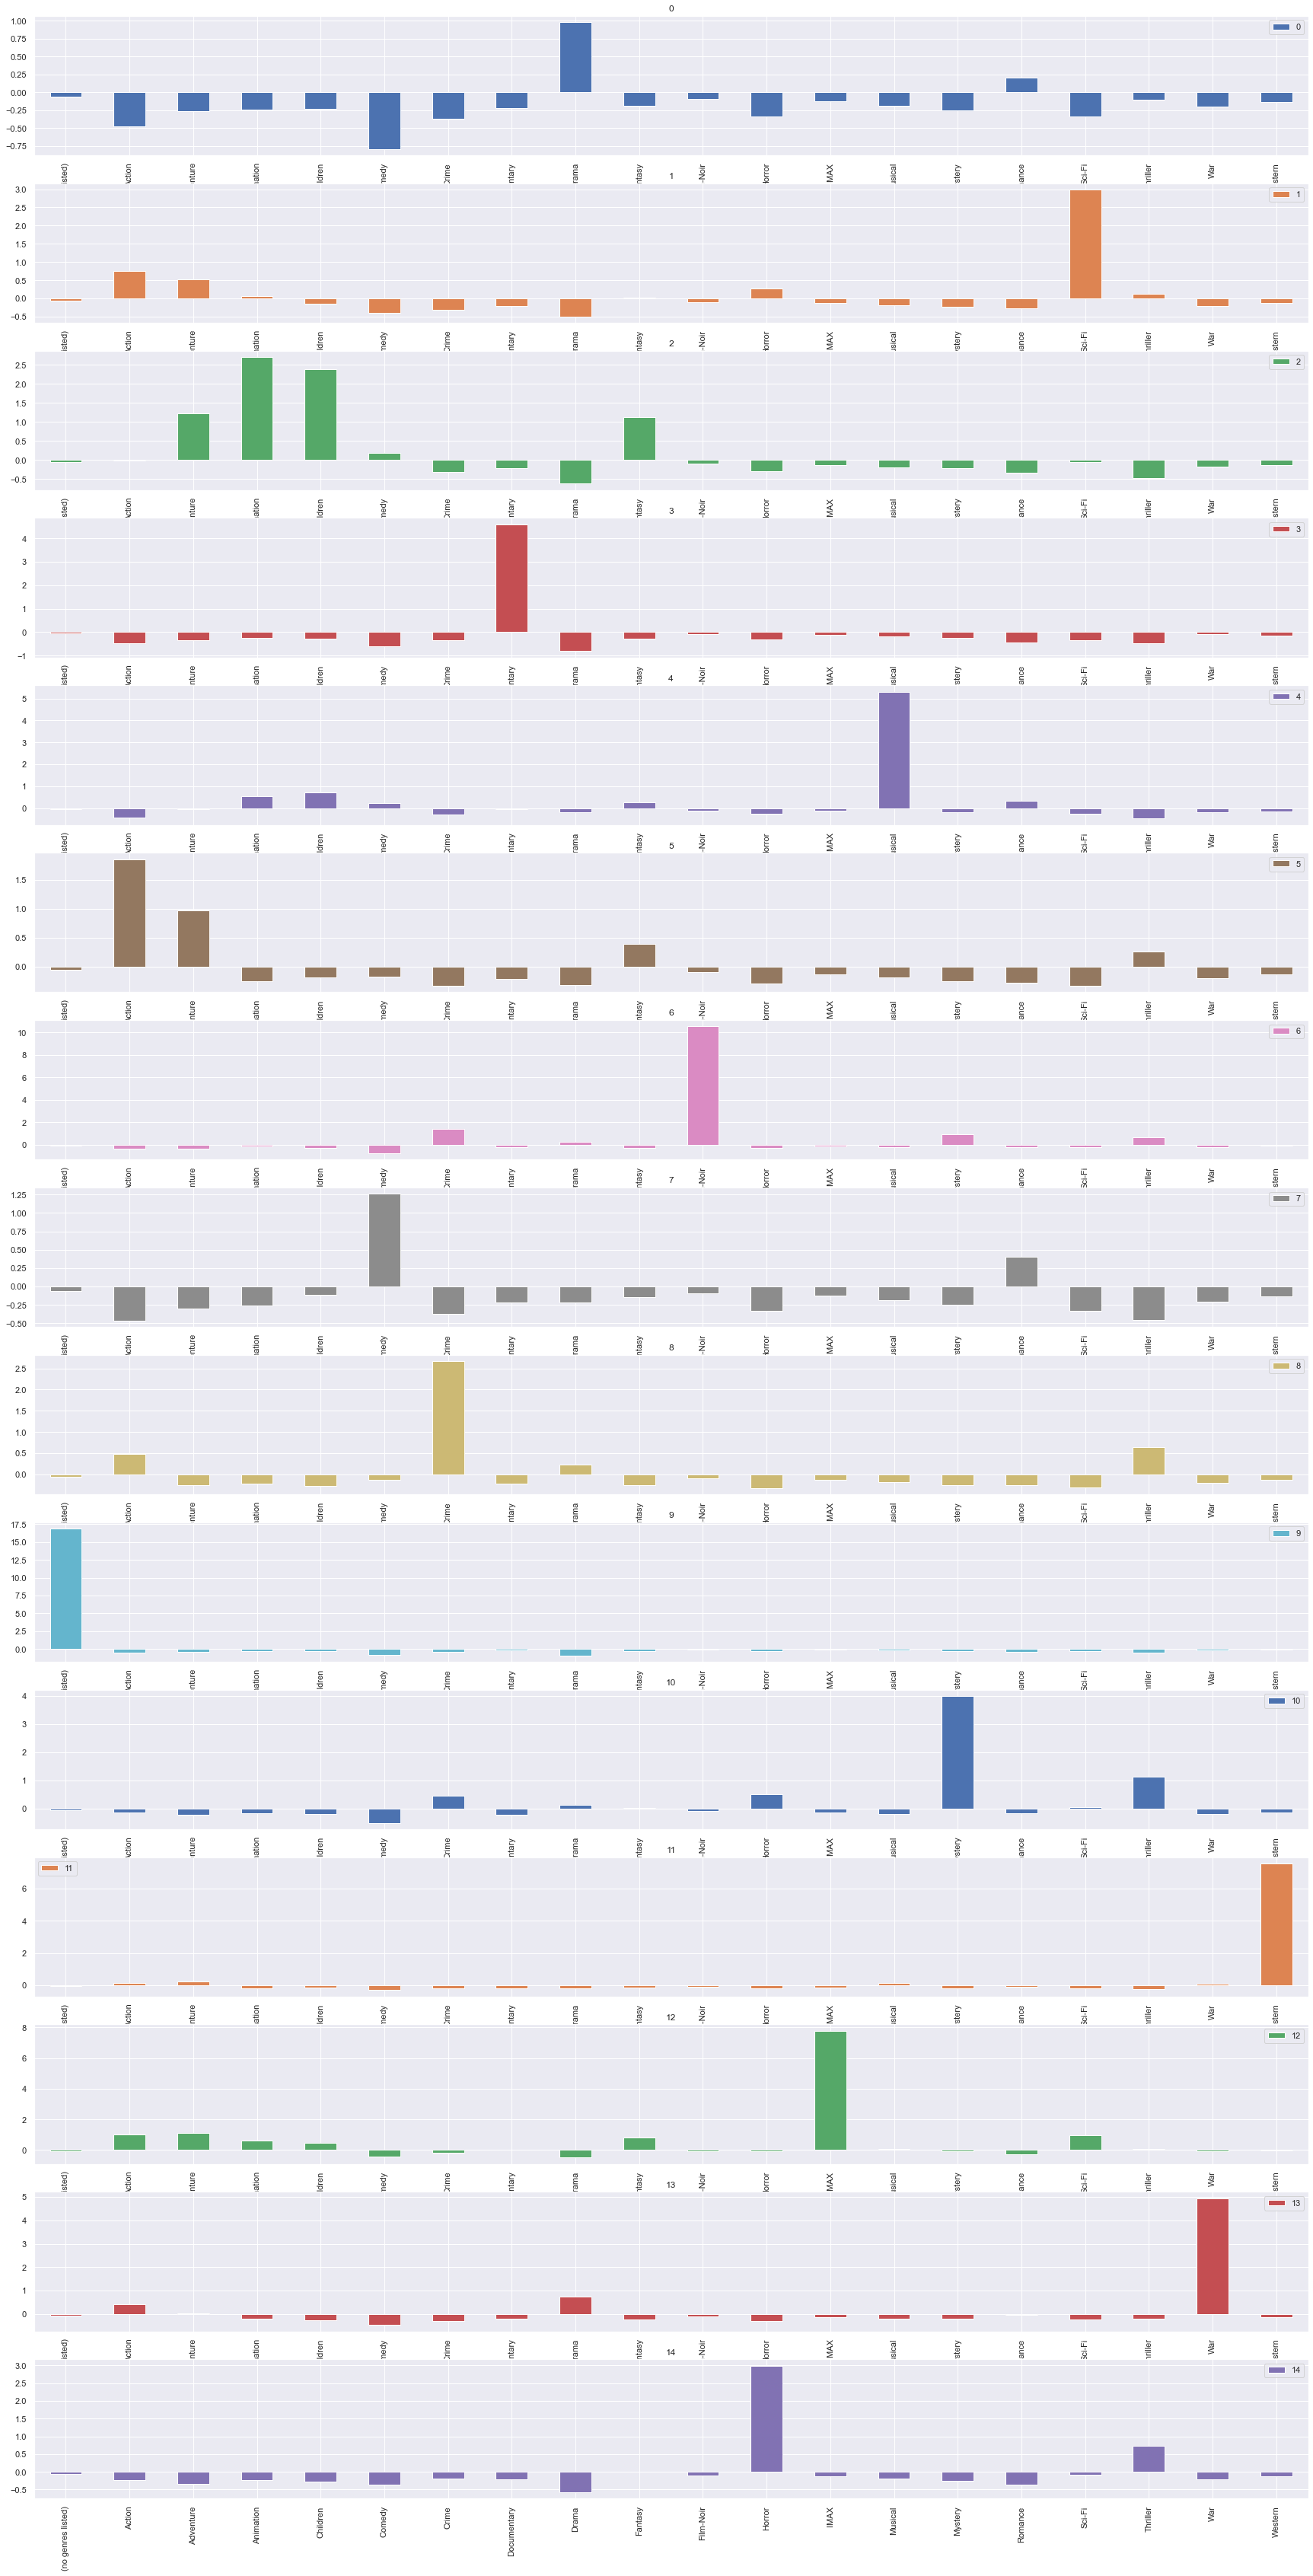

In [107]:
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,60), sharex=False)

In [67]:
from sklearn.manifold import TSNE #TSNE joga a estatistica em um grafico de dois eixos
tsne = TSNE()
visualizacao = tsne.fit_transform (scaled_genres)

In [68]:
visualizacao

array([[ 57.67603  ,  27.290987 ],
       [ 38.630352 ,  35.278973 ],
       [-36.887    , -10.126911 ],
       ...,
       [-15.208302 ,   7.8452606],
       [ 30.866852 ,  10.89851  ],
       [ 18.052567 , -12.763666 ]], dtype=float32)

In [69]:
import seaborn as sns

In [78]:
sns.set(rc={'figure.figsize':(20,20)})

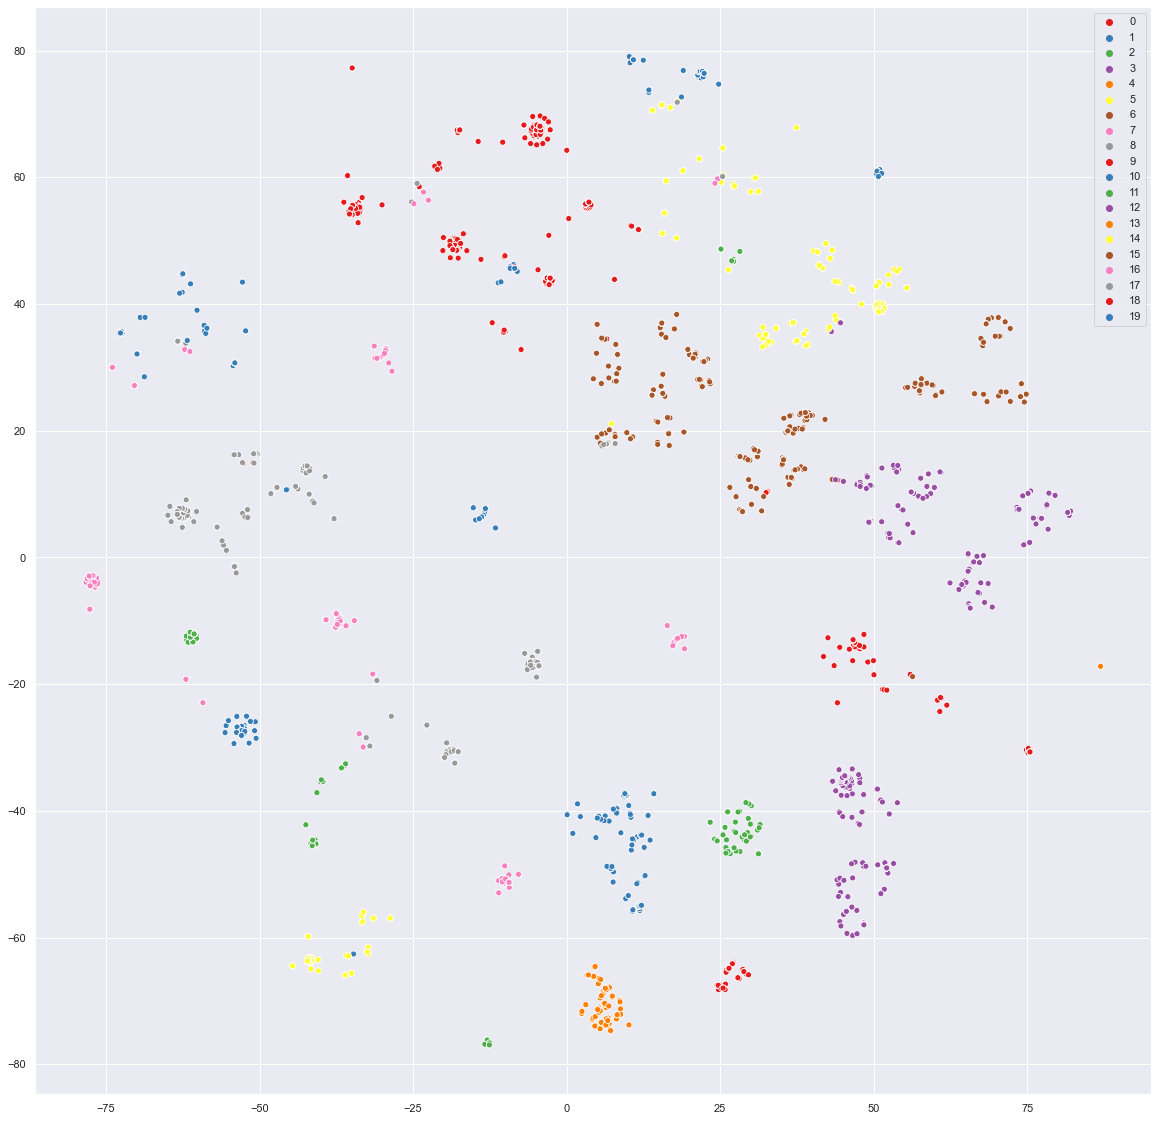

In [80]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue = model.labels_, palette=sns.color_palette('Set1', 20))

In [81]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 3)
model.fit (scaled_genres)

KMeans(n_clusters=3)

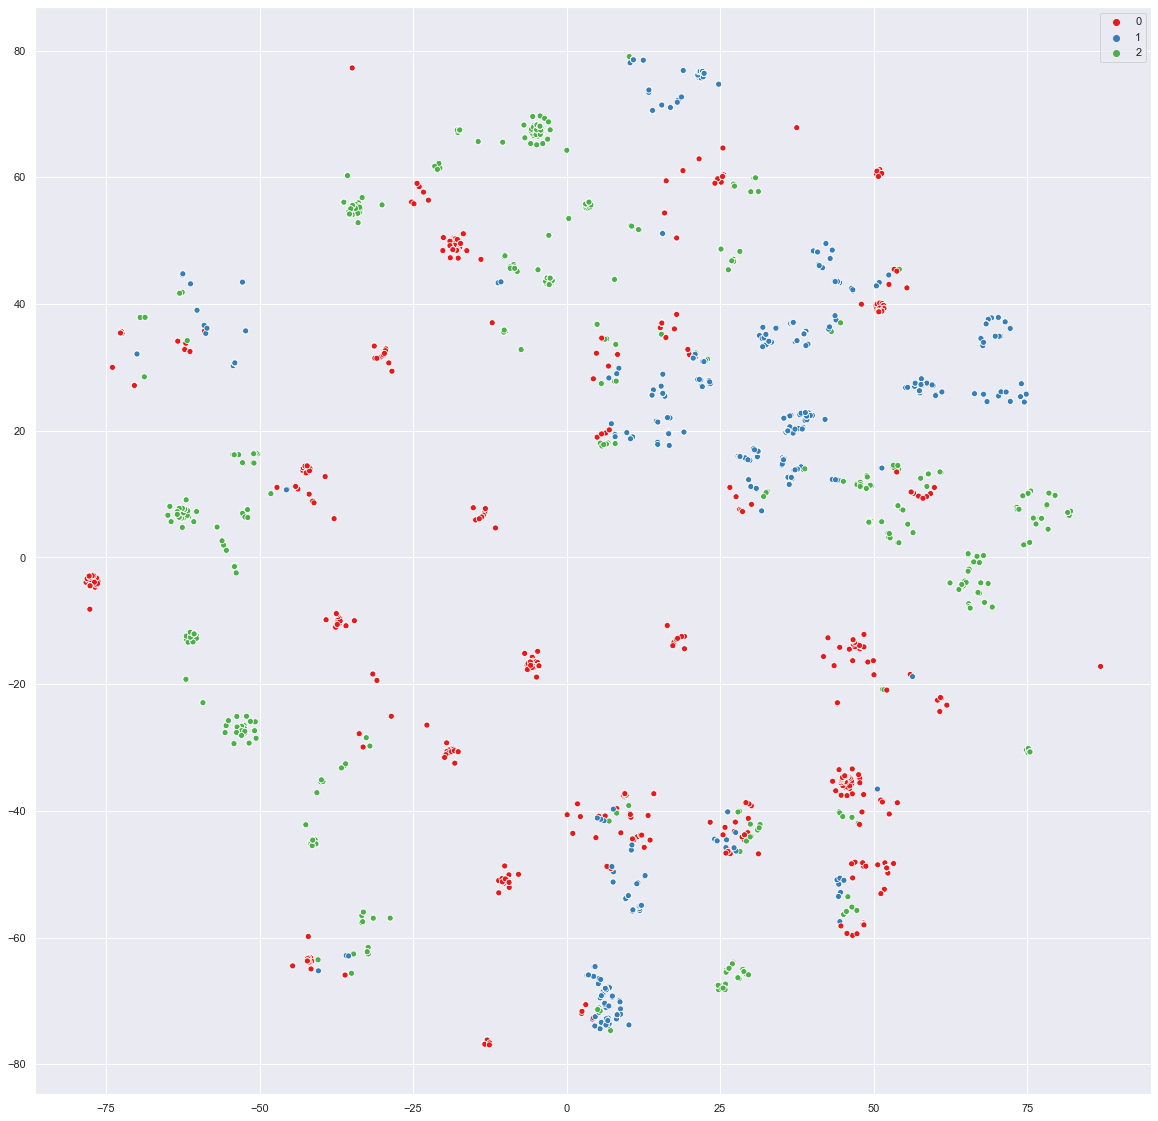

In [82]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue = model.labels_, palette=sns.color_palette('Set1', 3))

In [91]:
from sklearn.cluster import KMeans

def get_kmeans (numero_clusters):
    model = KMeans (n_clusters=numero_clusters)
    model.fit (scaled_genres)
    return [numero_clusters, model.inertia_]

In [92]:
get_kmeans(3)

[3, 168602.38816758923]

In [93]:
get_kmeans(20)

[20, 56471.83107268809]

In [94]:
get_kmeans(41)

[41, 35409.18814694611]

In [111]:
resultado = []

for numero_clusters in range(1, 41) : # como eu tinha 20 categorias, testei o dobro de categorias para achar o nº ideal (dica)
    r = get = get_kmeans(numero_clusters)
    resultado.append(r)

In [102]:
resultado = pd.DataFrame(resultado, columns = ['clusters', 'inertia'])

In [103]:
resultado.head()

,clusters,inertia
0,1,194840.000000
1,2,179523.382653
2,3,168249.643120
3,4,157462.113404
4,5,146642.545970


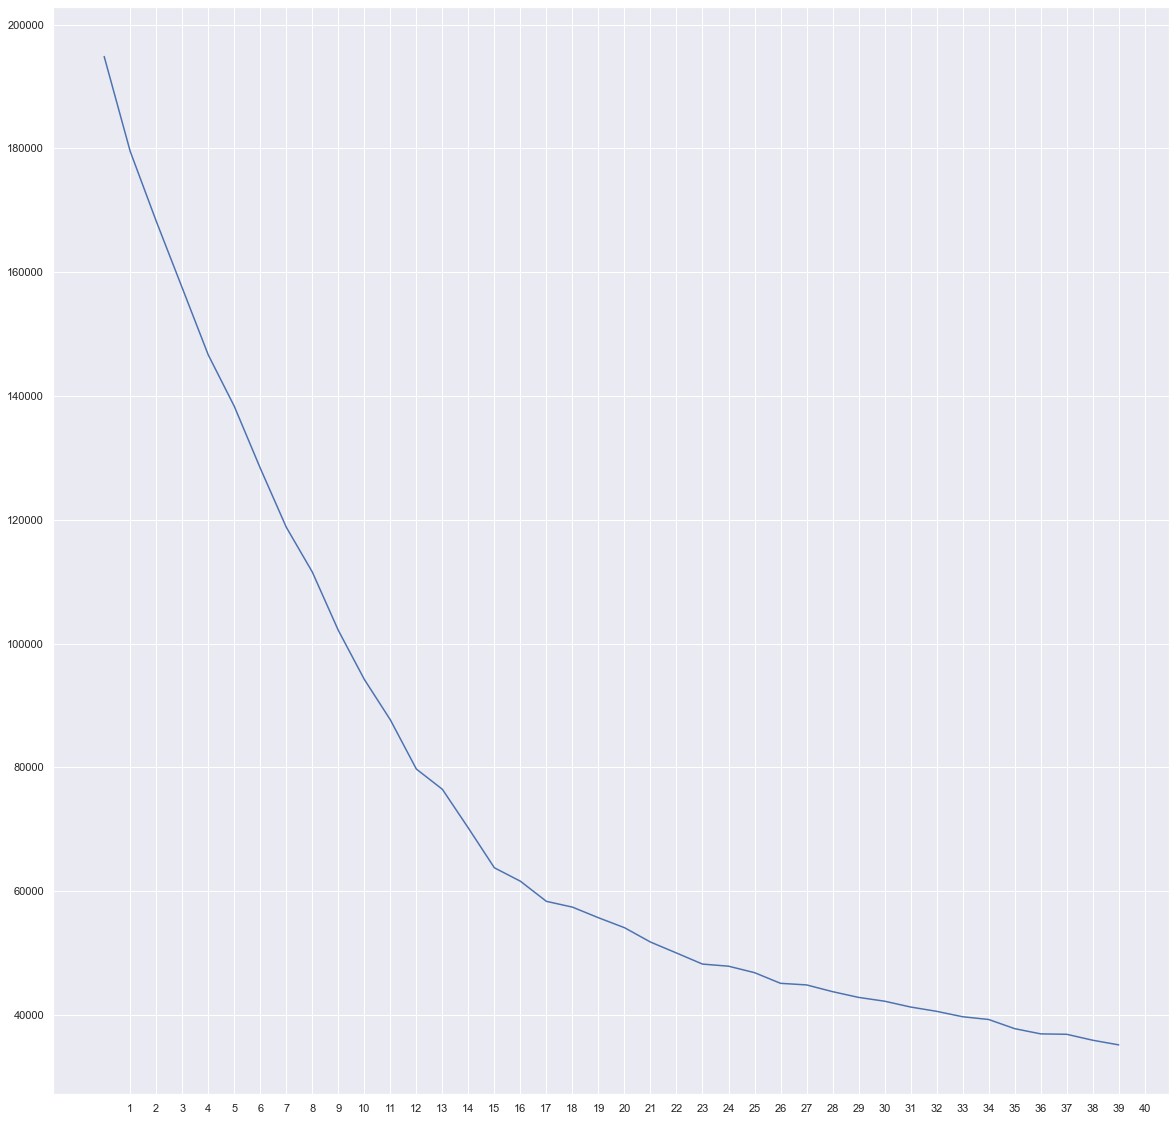

In [104]:
#Fábio Henrique Moreira
#T194 - Indústria 4.0
resultado['inertia'].plot(xticks = resultado['clusters']) 
#numero ideal de clusters é quando tiver a segunda queda 'brusca' de direção, essa verificação é somente visual, no meu deu 15 e no professor deu 14

In [105]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 15)
model.fit (scaled_genres)

KMeans(n_clusters=15)

In [108]:
df_clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B6B38E250>,
      dtype=object)

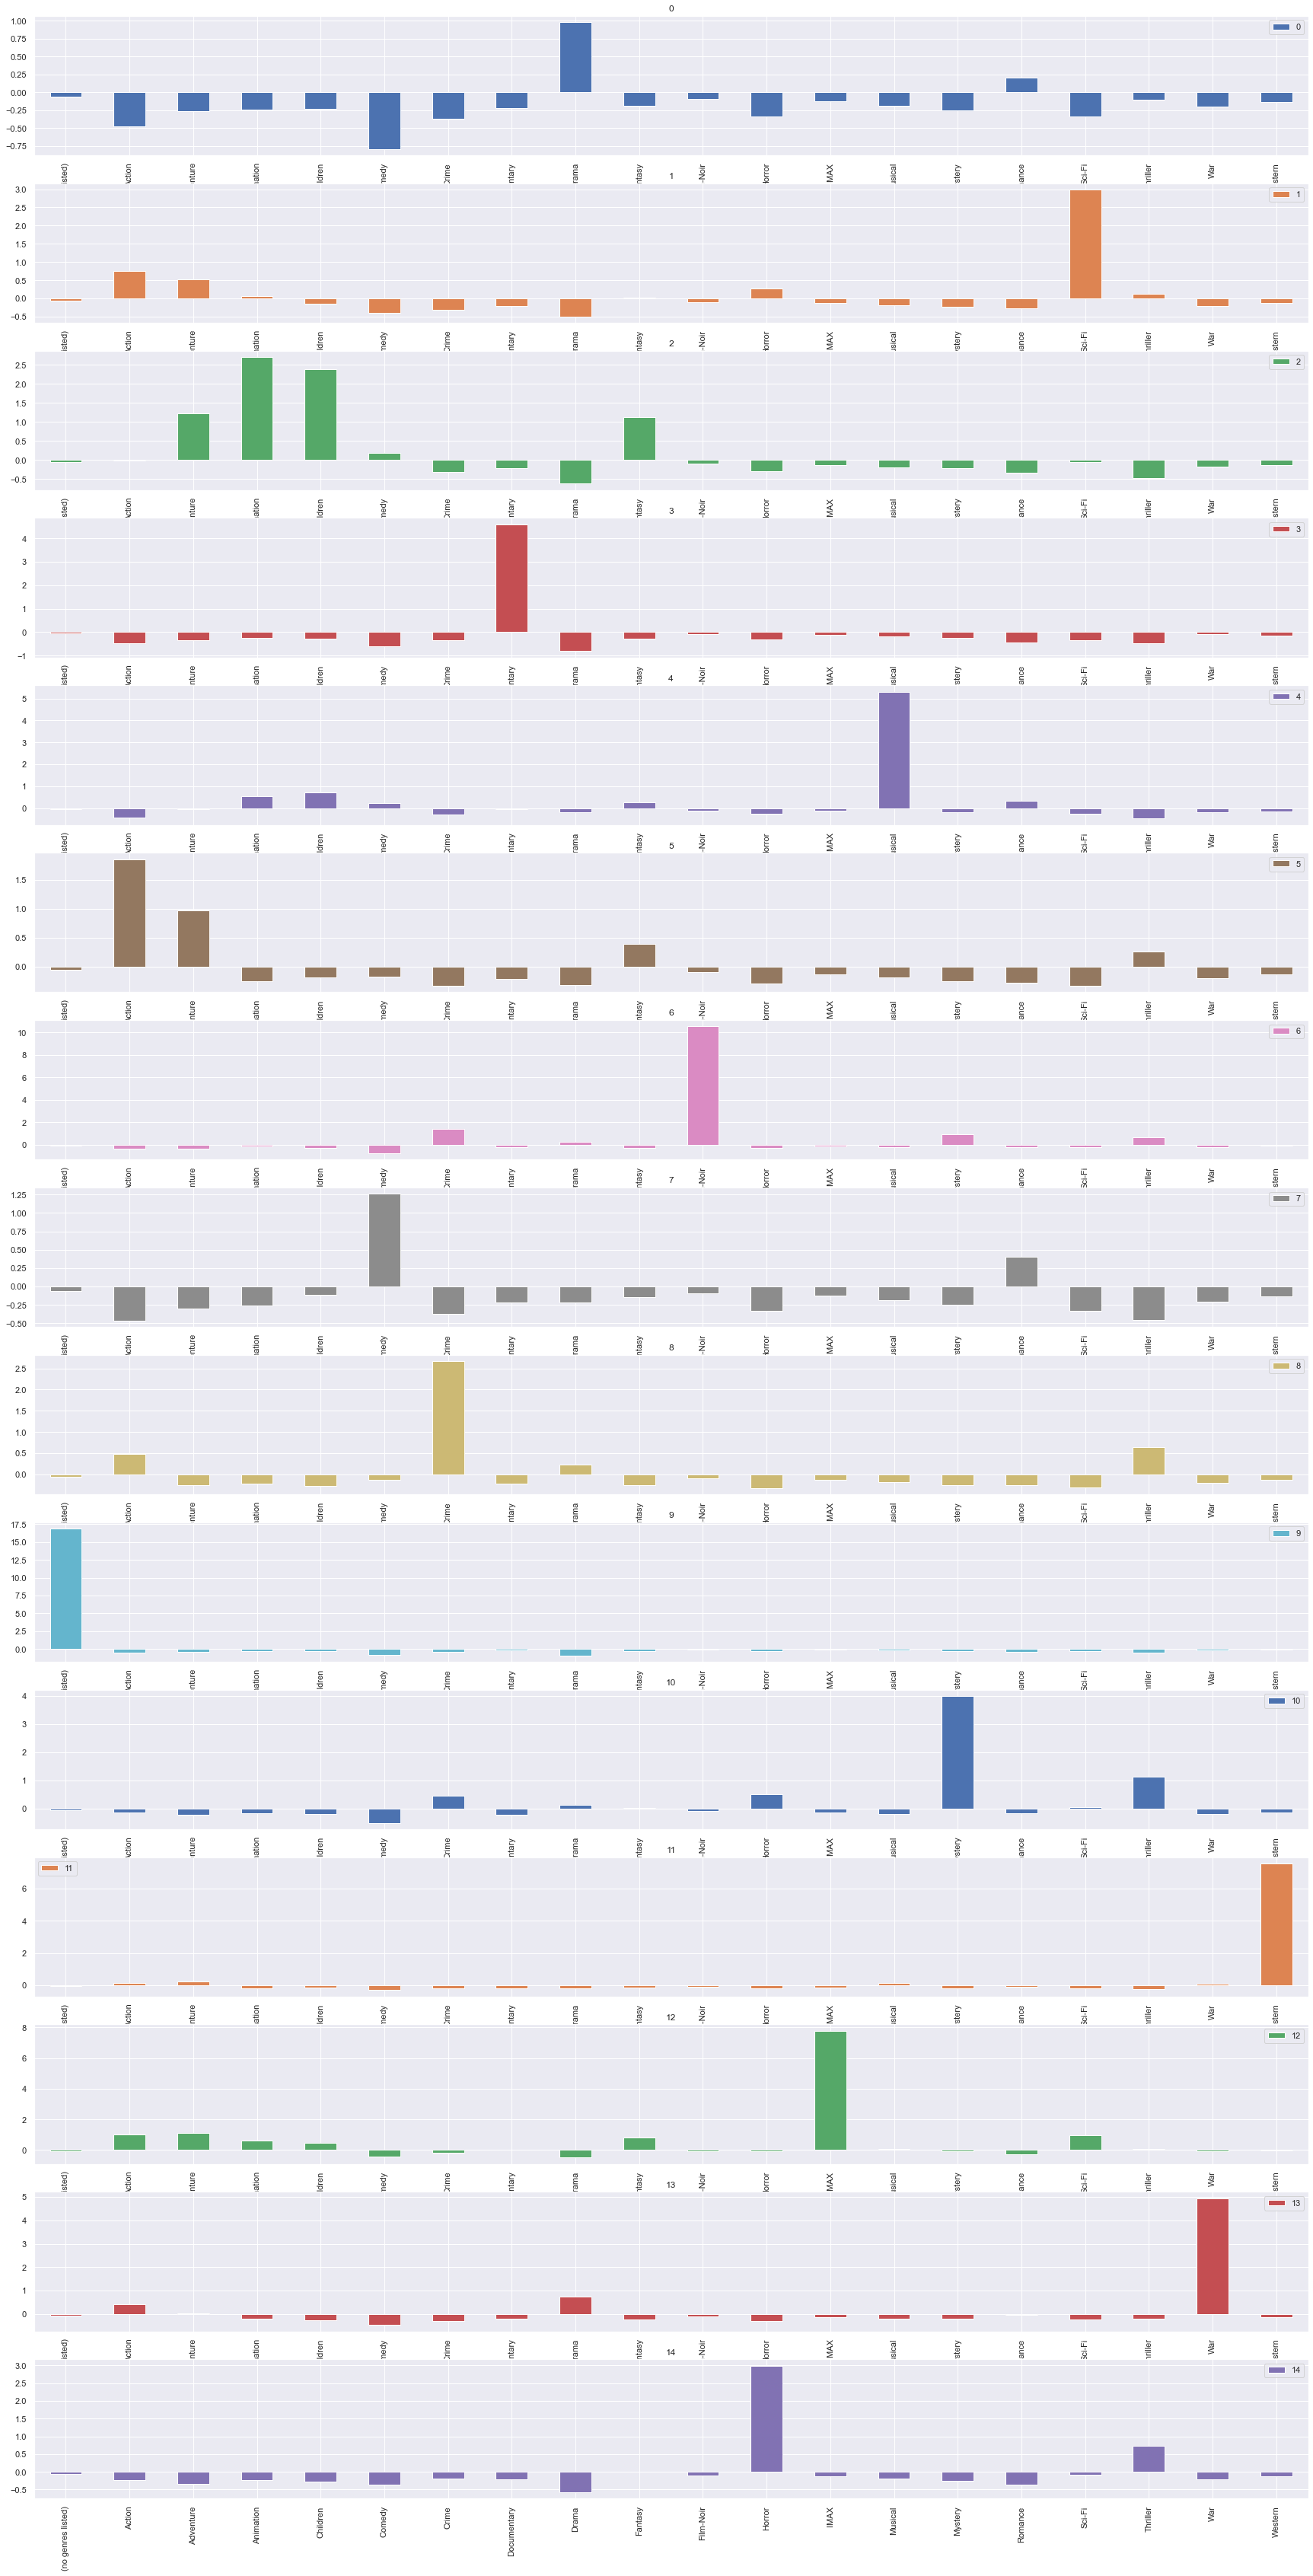

In [109]:
df_clusters.transpose().plot.bar(subplots=True, figsize=(30,60), sharex=False)

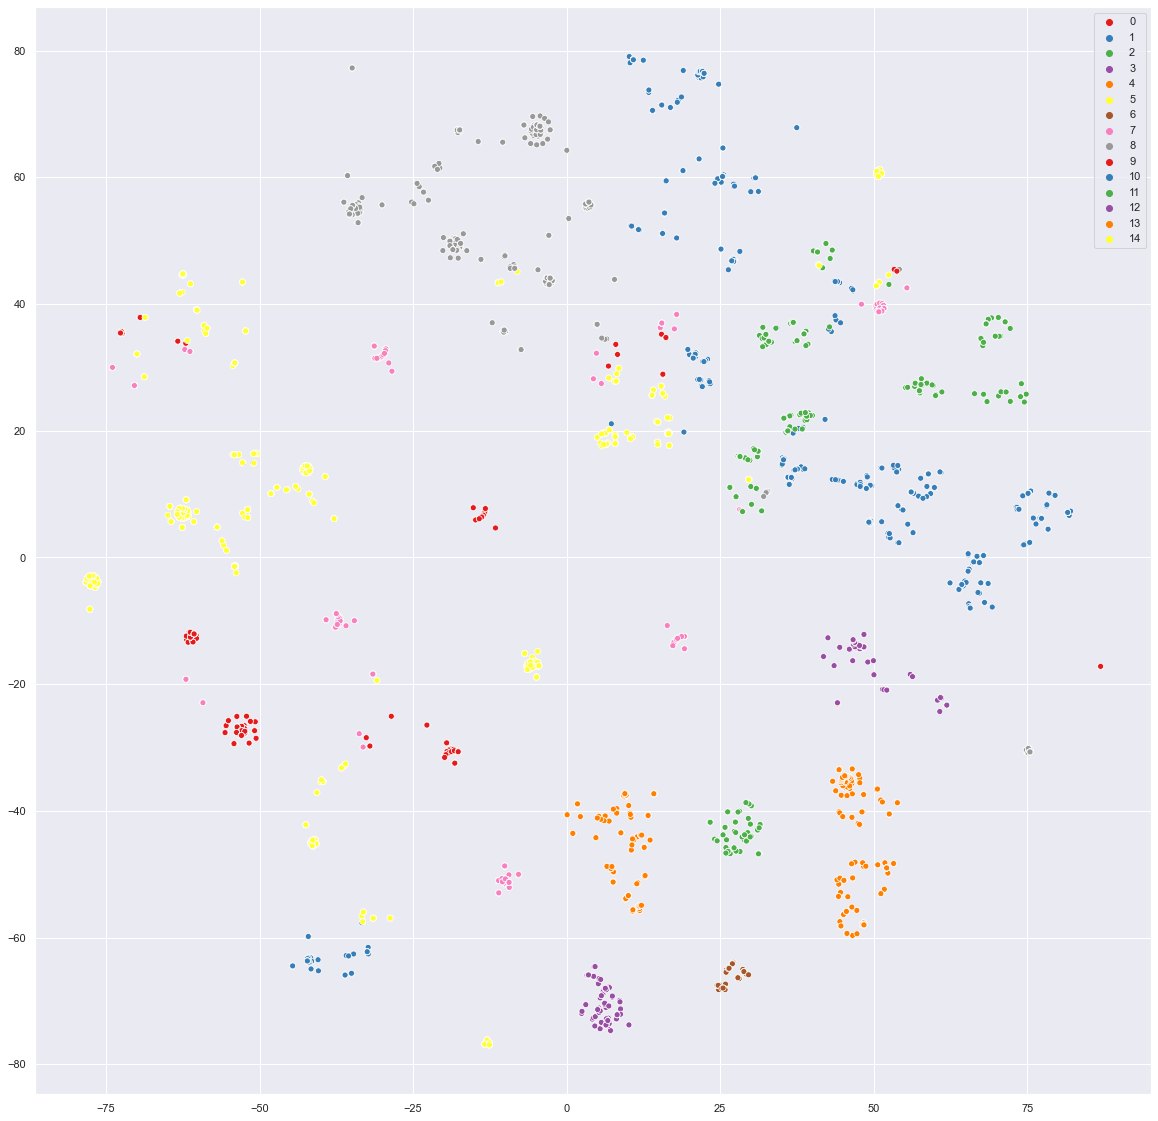

In [110]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue = model.labels_, palette=sns.color_palette('Set1', 15))

In [128]:
df_movies[model.labels_ == 12]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
123,150,Apollo 13 (1995),Adventure|Drama|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,0,0,1,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,0,0,0,1,1,0,0,...,0,0,1,1,0,1,0,0,0,0
1328,1797,Everest (1998),Documentary|IMAX,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2381,3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8426,111364,Godzilla (2014),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8433,111659,Maleficent (2014),Action|Adventure|Children|IMAX,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8438,111759,Edge of Tomorrow (2014),Action|Sci-Fi|IMAX,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8564,116529,Stalingrad (2013),Action|Drama|War|IMAX,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


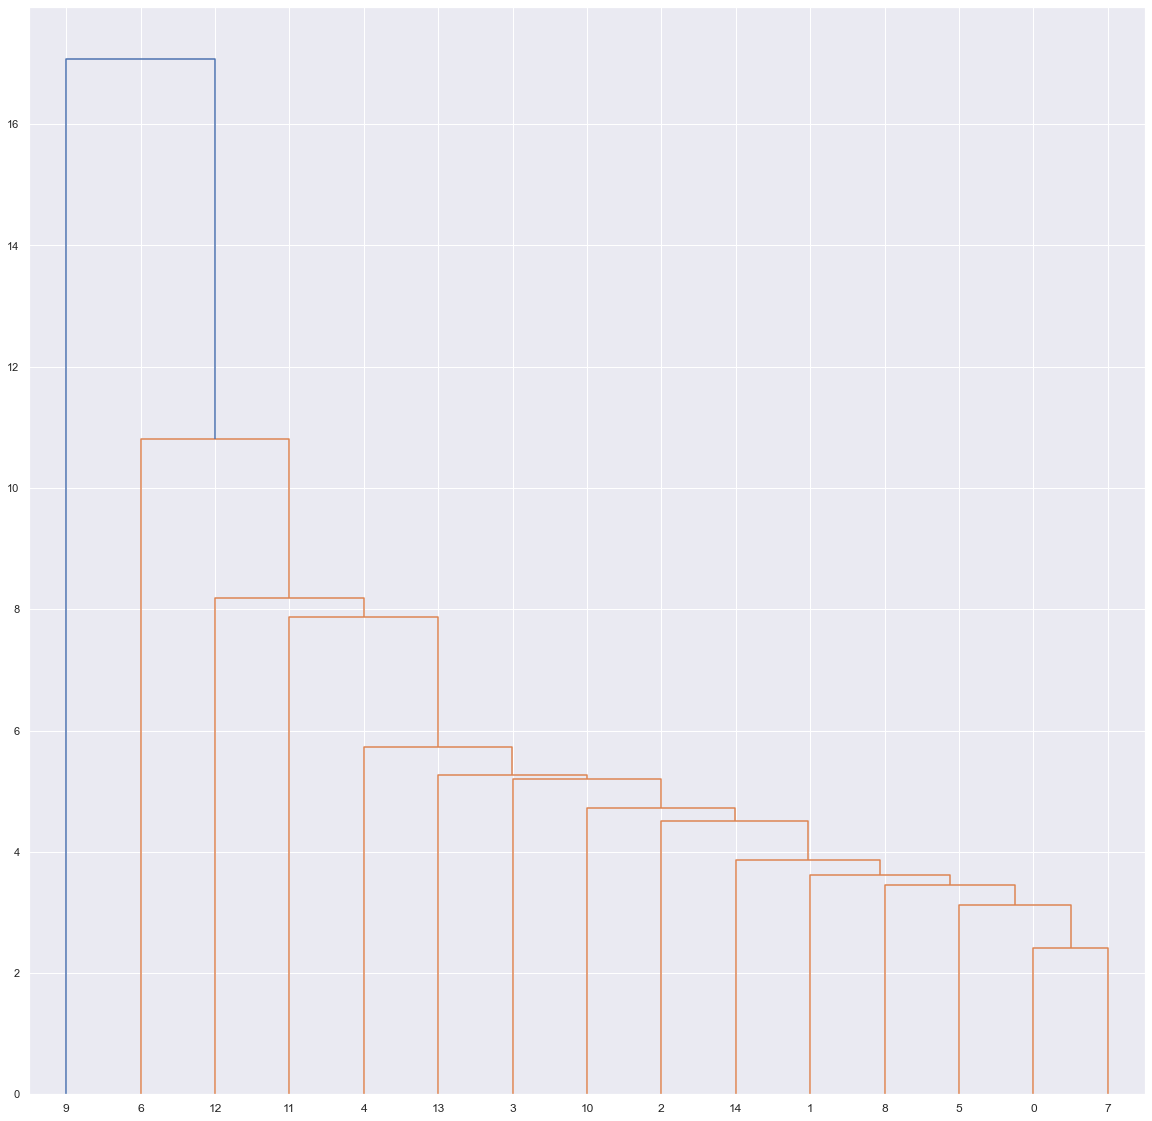

In [143]:
#Fábio Henrique Moreira
#T194 - Indústria 4.0
from scipy.cluster.hierarchy import dendrogram, linkage
distance_matrix = linkage(df_clusters)
den = dendrogram(distance_matrix) #atribuindo o den ele não mostra os dados matemáticos do dendrogram